---

# Understanding Data

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Monatszahlen_Verkehrsunfälle.csv')

# Step 2: Drop the specified columns
columns_to_drop = ["VORJAHRESWERT", "VERAEND_VORMONAT_PROZENT", "VERAEND_VORJAHRESMONAT_PROZENT", "ZWOELF_MONATE_MITTELWERT"]
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the DataFrame
print(df[50:55])


        MONATSZAHL AUSPRAEGUNG  JAHR   MONAT   WERT
50  Alkoholunfälle   insgesamt  2020   Summe  430.0
51  Alkoholunfälle   insgesamt  2020  202001   28.0
52  Alkoholunfälle   insgesamt  2020  202002   40.0
53  Alkoholunfälle   insgesamt  2020  202003   27.0
54  Alkoholunfälle   insgesamt  2020  202004   26.0


In [2]:
x = df[df['JAHR'] <= 2020]

print (x['MONATSZAHL'].unique())
print (x['AUSPRAEGUNG'].unique())
print (min(x['JAHR'].unique()))
print (min(x['MONAT'].unique()))




['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']
['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']
2000
200001


In [3]:
# Group by category and type and count NaN values in 'WERT'
nan_counts = x.groupby(['MONATSZAHL', 'AUSPRAEGUNG'])['WERT'].apply(lambda x: x.isna().sum()).reset_index()

# Rename the column for clarity
nan_counts.rename(columns={'WERT': 'NaN_Count'}, inplace=True)
print(nan_counts)

        MONATSZAHL             AUSPRAEGUNG  NaN_Count
0   Alkoholunfälle  Verletzte und Getötete          0
1   Alkoholunfälle               insgesamt          0
2    Fluchtunfälle  Verletzte und Getötete          0
3    Fluchtunfälle               insgesamt          0
4  Verkehrsunfälle  Verletzte und Getötete          0
5  Verkehrsunfälle               insgesamt          0
6  Verkehrsunfälle     mit Personenschäden          0


# Data Visualization


## You will see the line plot for each category with mean per year

<Figure size 1200x800 with 0 Axes>

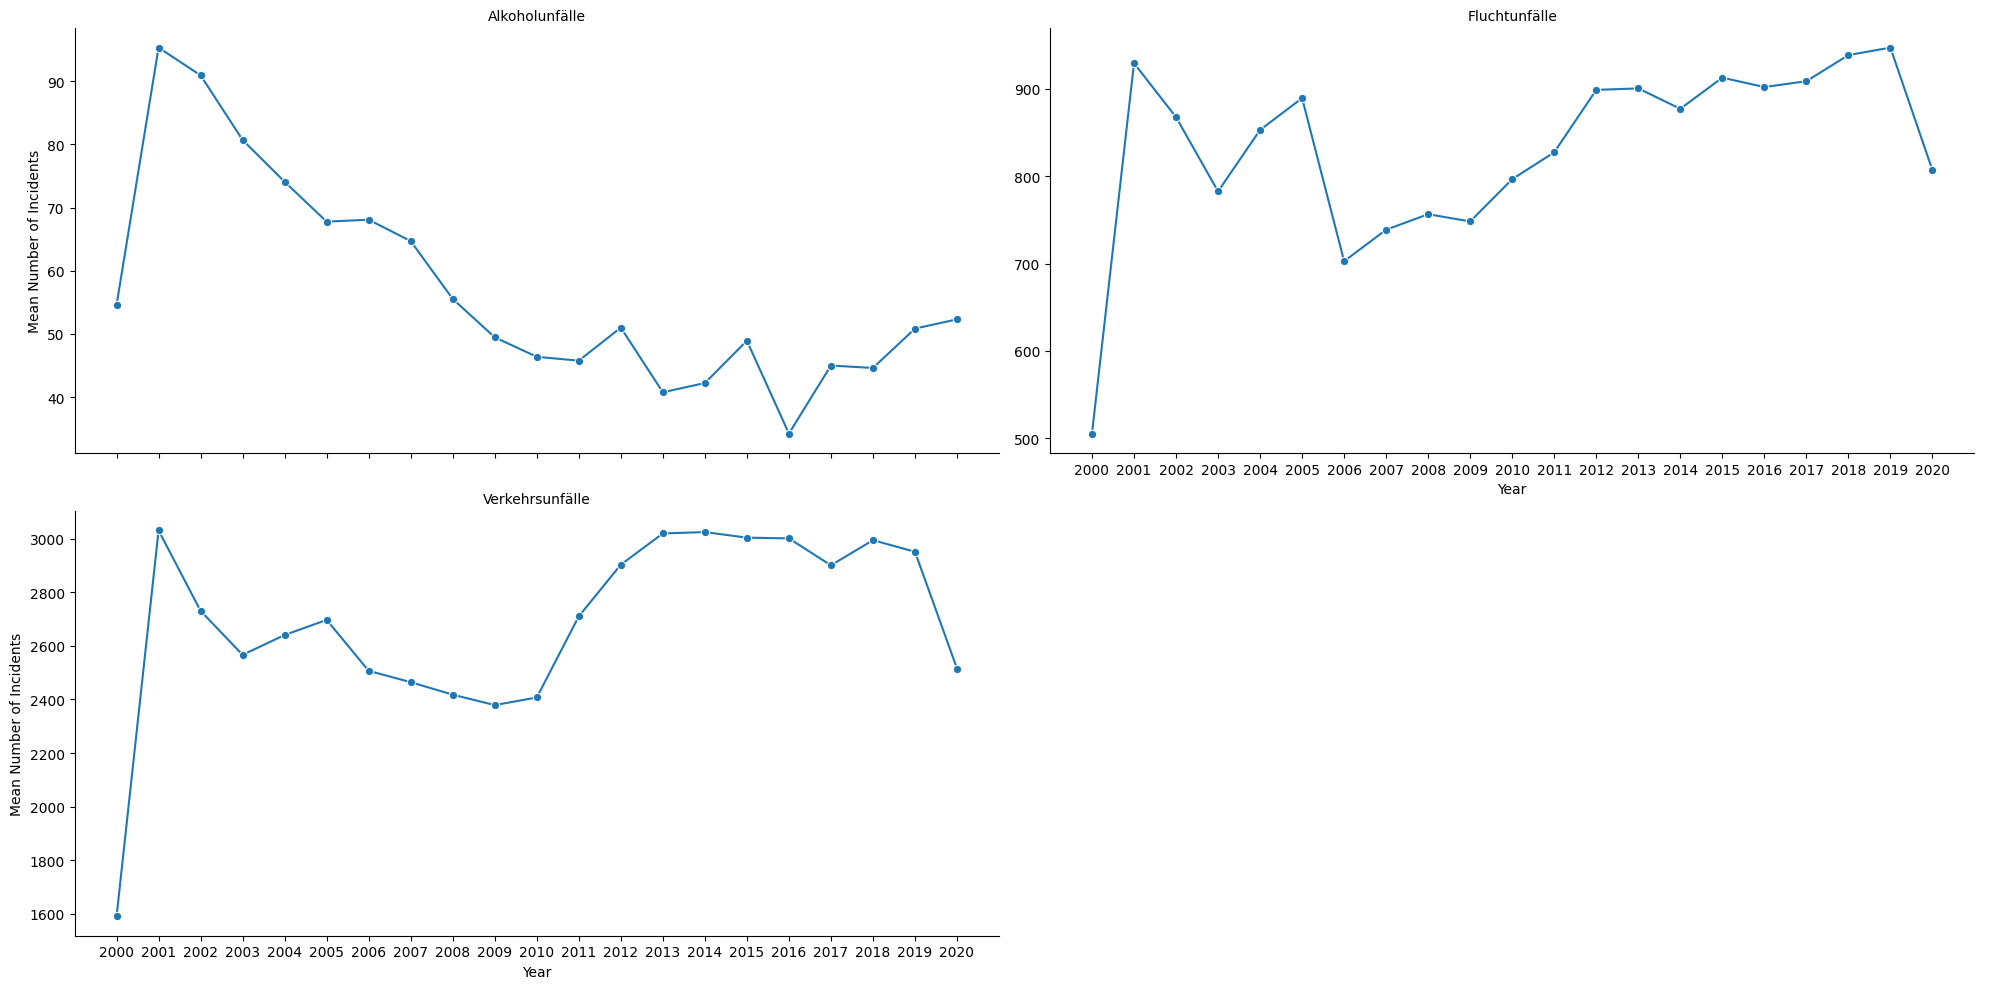

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

y = df[df['JAHR'] <= 2020]
y_mean = y.groupby(['MONATSZAHL', 'JAHR'])['WERT'].mean().reset_index()

# Ensure 'JAHR' is treated as a string for proper ordering in plots
y_mean['JAHR'] = y_mean['JAHR'].astype(str)

# Plotting
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(y_mean, col='MONATSZAHL', col_wrap=2, height=5, aspect=2, sharey=False)

# Use lineplot with x='JAHR' and y='WERT'
g.map(sns.lineplot, 'JAHR', 'WERT', marker='o')

# Add labels and legend
g.add_legend()
g.set_axis_labels("Year", "Mean Number of Incidents")
g.set_titles(col_template="{col_name}")

# Show plot
plt.show()

## All categories with their mean per year in single plot, highest is verkehrsunfall

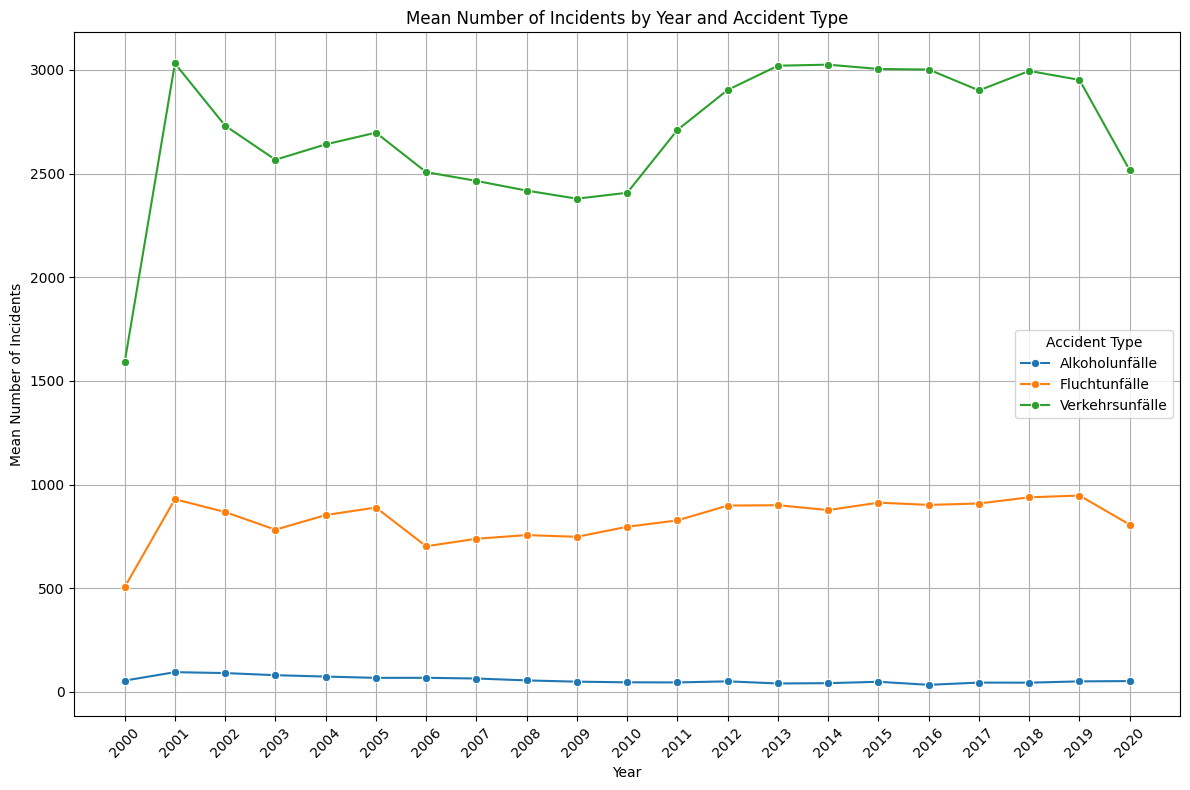

In [5]:
plt.figure(figsize=(12, 8))

# Plot each category with a different line
sns.lineplot(data=y_mean, x='JAHR', y='WERT', hue='MONATSZAHL', marker='o')

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Mean Number of Incidents")
plt.title("Mean Number of Incidents by Year and Accident Type")
plt.legend(title='Accident Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## The blue shaded area is the range of values and the line is the mean for the following plot

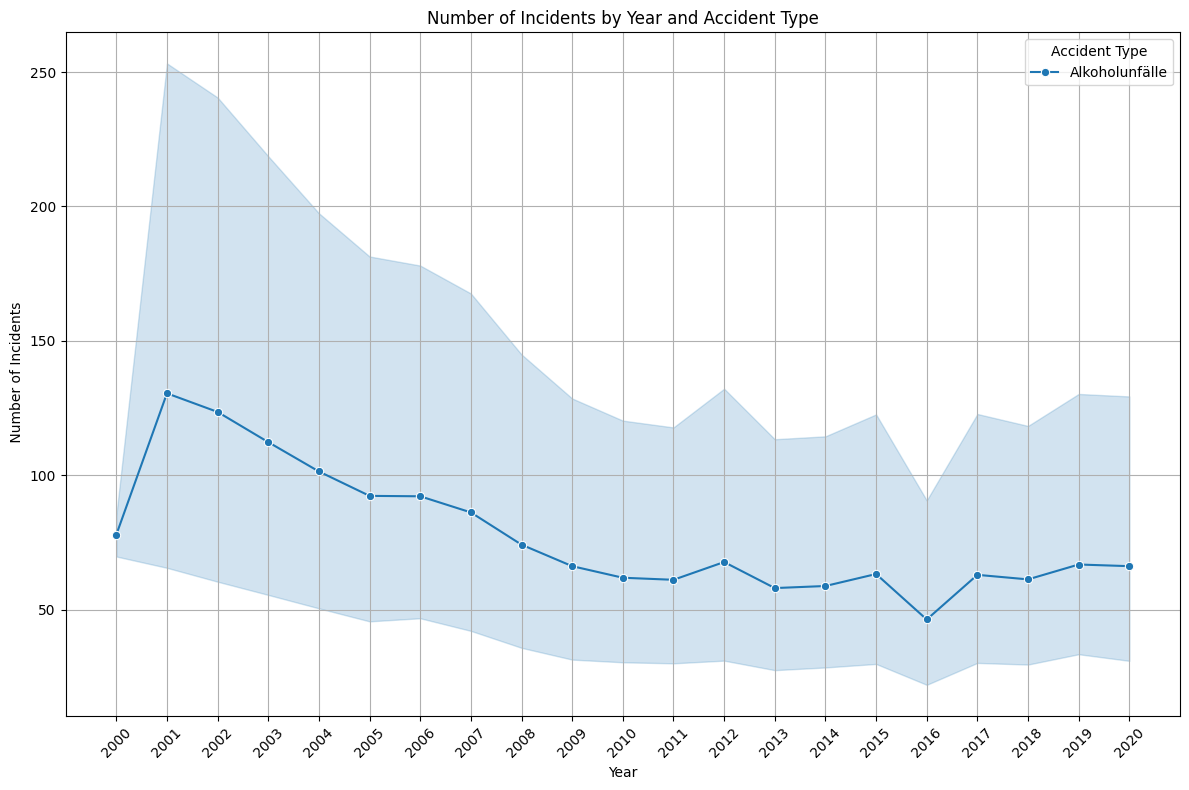

In [6]:
y=df.copy()

# Filtering data
y=y[y['JAHR'] <= 2020]
y['JAHR'] = y['JAHR'].astype(str) 

y = y.sort_values(by='JAHR')
y = y[(y['MONATSZAHL'] == 'Alkoholunfälle') & (y['AUSPRAEGUNG'] == 'insgesamt')]


plt.figure(figsize=(12, 8))

# Plot each category with a different line
sns.lineplot(data=y, x='JAHR', y='WERT', hue='MONATSZAHL', marker='o')

# Add labels and legend
plt.xlabel("Year")
plt.ylabel(" Number of Incidents")
plt.title("Number of Incidents by Year and Accident Type")
plt.legend(title='Accident Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Model training testing and Predicting values 

In [26]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Monatszahlen_Verkehrsunfälle.csv')

# Drop the specified columns
columns_to_drop = ["VORJAHRESWERT", "VERAEND_VORMONAT_PROZENT", "VERAEND_VORJAHRESMONAT_PROZENT", "ZWOELF_MONATE_MITTELWERT"]
df = df.drop(columns=columns_to_drop)



# Filter the data for the given category and type and year
filtered_df = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt')]
filtered_df=filtered_df[filtered_df['JAHR'] <= 2020]

# Exclude rows where 'MONAT' is 'Summe'
filtered_df = filtered_df[filtered_df['MONAT'] != 'Summe']
filtered_df['MONAT'] = filtered_df['MONAT'].str[4:]


# Drop rows with missing 'WERT' values (if any)
filtered_df.dropna(subset=['WERT'], inplace=True)

# Define features and target

X = filtered_df[['JAHR', 'MONAT']].astype(int)
y = filtered_df['WERT']

In [20]:
wert_min = filtered_df['WERT'].min()
wert_max = filtered_df['WERT'].max()
wert_mean = filtered_df['WERT'].mean()
wert_variance = filtered_df['WERT'].var()

print(f'Min WERT: {wert_min}')
print(f'Max WERT: {wert_max}')
print(f'Mean WERT: {wert_mean}')
print(f'Variance of WERT: {wert_variance}')


Min WERT: 0.0
Max WERT: 4763.0
Mean WERT: 780.2925170068028
Variance of WERT: 1394378.6597057427


In [59]:
# Load the CSV file into a DataFrame
df_target = pd.read_csv('Monatszahlen_Verkehrsunfälle.csv')

# Step 2: Drop the specified columns
columns_to_drop = ["VORJAHRESWERT", "VERAEND_VORMONAT_PROZENT", "VERAEND_VORJAHRESMONAT_PROZENT", "ZWOELF_MONATE_MITTELWERT"]
df_target = df_target.drop(columns=columns_to_drop)
df_target = df_target[(df_target['MONATSZAHL'] == 'Alkoholunfälle') & (df_target['AUSPRAEGUNG'] == 'insgesamt')]

df_target['MONAT'] = df_target['MONAT'].astype(str)
df_target = df_target[ (df_target['MONAT'] == '202105')]
print(df_target)

        MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT
42  Alkoholunfälle   insgesamt  2021  202105  24.0


### Among the following we can see that best performing modle is XGboost with lowest MSE so we use that as our model to deploy

#### Random forest regressor

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f'Best Parameters: {grid_search.best_params_}')

# Best estimator
best_RFR_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_RFR_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Define the input data for prediction
input_data = pd.DataFrame({'JAHR': [2021], 'MONAT': [1]})

# Make the prediction
prediction = best_RFR_model.predict(input_data)
print(f'Predicted WERT for Alkoholunfälle, insgesamt, January 2021: {prediction[0]}')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 71.39929851894036
Predicted WERT for Alkoholunfälle, insgesamt, January 2021: 26.73907451576201


#### XGboost regressor 

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model with hyperparameter tuning
xg_model = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
print(f'Best Parameters: {grid_search.best_params_}')

# Best model from grid search
best_XGB_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_XGB_model.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Define the input data for prediction (Ensure it matches the feature columns and types)
input_data = pd.DataFrame({'JAHR': [2021], 'MONAT': [1]})

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Make the prediction
xg_prediction = best_XGB_model.predict(input_data_scaled)
print(f'Predicted WERT for Alkoholunfälle, insgesamt, January 2021: {xg_prediction[0]}')



Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Mean Squared Error: 56.81241084469302
Predicted WERT for Alkoholunfälle, insgesamt, January 2021: 27.145978927612305


#### Gradiant boost regressor 

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Gradient Boosting with less verbose output
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=3,
    n_jobs=-1,
    verbose=1,  # Reduce verbosity
    scoring='neg_mean_squared_error'
)

# Perform grid search
grid_search_gb.fit(X_train, y_train)

# Best parameters for Gradient Boosting
print(f'Best Parameters (Gradient Boosting): {grid_search_gb.best_params_}')

# Best estimator for Gradient Boosting
best_gb_model = grid_search_gb.best_estimator_

# Predict on the test set with Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)

# Calculate the Mean Squared Error for Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')

# Define the input data for prediction
input_data = pd.DataFrame({'JAHR': [2021], 'MONAT': [1]})

# Make the prediction with Gradient Boosting
prediction_gb = best_gb_model.predict(input_data)
print(f'Predicted WERT for Alkoholunfälle, insgesamt, January 2021 (Gradient Boosting): {prediction_gb[0]}')


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error (Gradient Boosting): 63.57719806502158
Predicted WERT for Alkoholunfälle, insgesamt, January 2021 (Gradient Boosting): 28.15137409353231


/Users/wassey/Desktop/challange_ai/Digital_product_school_Ai_challange/myvenv/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Support Vector Regression

In [43]:
# Define the parameter grid for SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.3]
}

# Initialize GridSearchCV for SVR
grid_search_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid_svr, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Perform grid search
grid_search_svr.fit(X_train, y_train)

# Best parameters for SVR
print(f'Best Parameters (SVR): {grid_search_svr.best_params_}')

# Best estimator for SVR
best_svr_model = grid_search_svr.best_estimator_

# Predict on the test set with SVR
y_pred_svr = best_svr_model.predict(X_test)

# Calculate the Mean Squared Error for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error (SVR): {mse_svr}')

# Make the prediction with SVR
prediction_svr = best_svr_model.predict(input_data)
print(f'Predicted WERT for Alkoholunfälle, insgesamt, January 2021 (SVR): {prediction_svr[0]}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters (SVR): {'C': 10, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error (SVR): 73.66782229061647
Predicted WERT for Alkoholunfälle, insgesamt, January 2021 (SVR): 37.352435650563635


# Pickling the model file for Deployment





#### Xgboost model selected for deployment 

Mean Squared Error: 56.81241084469302


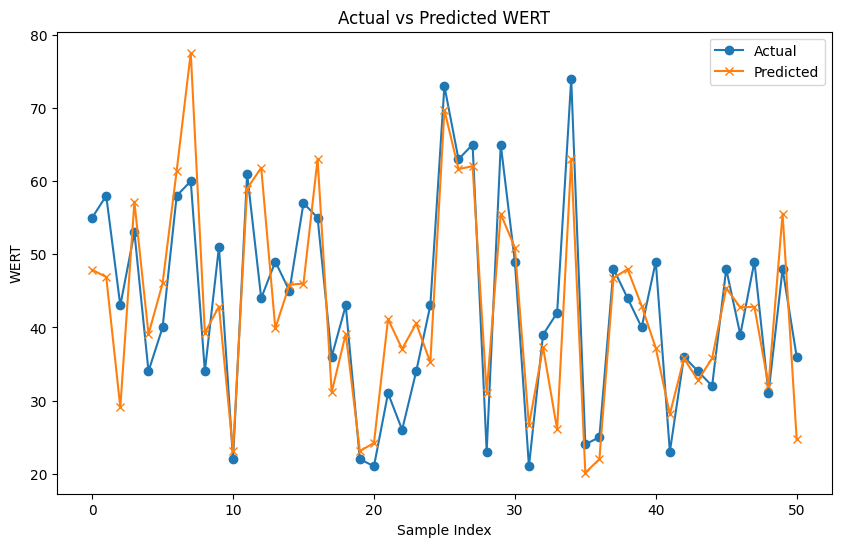

Predicted WERT for Alkoholunfälle, insgesamt, January 2021: 27.145978927612305


In [95]:
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor  
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('Monatszahlen_Verkehrsunfälle.csv')

# Drop the specified columns
columns_to_drop = ["VORJAHRESWERT", "VERAEND_VORMONAT_PROZENT", "VERAEND_VORJAHRESMONAT_PROZENT", "ZWOELF_MONATE_MITTELWERT"]
df = df.drop(columns=columns_to_drop)

filtered_df = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt')]
filtered_df = filtered_df[filtered_df['JAHR'] <= 2020]

# Exclude rows where 'MONAT' is 'Summe'
filtered_df = filtered_df[filtered_df['MONAT'] != 'Summe']
filtered_df['MONAT'] = filtered_df['MONAT'].str[4:].astype(int)

# Drop rows with missing 'WERT' values (if any)
filtered_df.dropna(subset=['WERT'], inplace=True)

# Define features and target
X = filtered_df[['JAHR', 'MONAT']].astype(int)
y = filtered_df['WERT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the XGBoost model
xg_model = XGBRegressor(n_estimators=100, random_state=42, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, subsample=0.7)

# Train the model
xg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('WERT')
plt.title('Actual vs Predicted WERT')
plt.legend()
plt.show()

# Define the input data for prediction
input_data = pd.DataFrame({'JAHR': [2021], 'MONAT': [1]})

# Make the prediction
prediction = xg_model.predict(input_data)
print(f'Predicted WERT for Alkoholunfälle, insgesamt, January 2021: {prediction[0]}')


In [96]:
import pickle
pickle.dump(xg_model,open('xg_model.pkl','wb'))

In [97]:
pickle_model = pickle.load(open('xg_model.pkl','rb'))

In [99]:
input_data = pd.DataFrame({'JAHR': [2021], 'MONAT': [1]})
x= pickle_model.predict(input_data)
print(x.astype(float))

[27.14597893]
